# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [2]:
import numpy as np
from scipy import signal
from pprint import pprint
import time
import matplotlib.pyplot as plt

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

### Вычисление линейной дискретной свертки последовательностей аналитически

$$ y[k] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[k -m] $$
$$ y[0] = \sum\limits_{m=-\infty}^{+\infty} x[m] \cdot h[0 - m] = x[0] \cdot m[0] = 1 $$
$$ y[1] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[1 - m] = x[0] \cdot y[1] + x[1] \cdot y[0] = 2 $$
$$ y[2] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[2 - m] = x[0] \cdot y[2] + x[1] \cdot y[1] + x[2] \cdot y[0] = 3 $$
$$ y[3] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[3 - m] = x[0] \cdot y[3] + x[1] \cdot y[2] + x[2] \cdot y[1] + x[3] \cdot y[0]= 4 $$
$$ y[4] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[4 - m] = x[1] \cdot y[3] + x[2] \cdot y[2] + x[3] \cdot y[1] + x[3] = 3 $$
$$ y[5] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[5 - m] = x[2] \cdot y[3] + x[3] \cdot y[2] = 2 $$
$$ y[6] = \sum\limits_{m=-\infty}^{+\infty} x[m] h[6 - m] = x[3] \cdot y[3] = 1 $$
$$ y[7] = 0, y[8] = 0 ... $$

### Вычисление результата с помощью моделирования

In [2]:
M = 4
x = np.array([1] * M)
h = x.copy()
y = signal.convolve(x, h)
y

array([1, 2, 3, 4, 3, 2, 1])

Значение аналитического расчета совпали с моделированием.

## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



In [3]:
N = 2 ** 17
n_0 = 128

k = np.arange(N)
x = np.cos(2 * np.pi * k * n_0 / N)
h = np.sin(2 * np.pi * k *  n_0 / N)


### Прямое вычисление при помощи свертки

In [4]:
start = time.time()
y_direct = signal.convolve(x, h, method="direct")
end = time.time()
pprint(y_direct)
print("Direct convolution: ", end - start, "seconds")

array([ 0.        ,  0.00613588,  0.01840731, ..., -0.03681184,
       -0.01840673, -0.00613577])
Direct convolution:  2.0924863815307617 seconds


### Вычисление с помощью ДПФ

In [5]:
start = time.time()
y_fft = signal.convolve(x, h, method="fft")
end = time.time()
pprint(y_fft)
assert np.allclose(y_direct, y_fft)
print("FFT convolution: ", end - start, "seconds")

array([-5.24229095e-14,  6.13588465e-03,  1.84073074e-02, ...,
       -3.68118428e-02, -1.84067299e-02, -6.13576914e-03])
FFT convolution:  0.03090953826904297 seconds


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

### Определение импульсной характеристики

[]

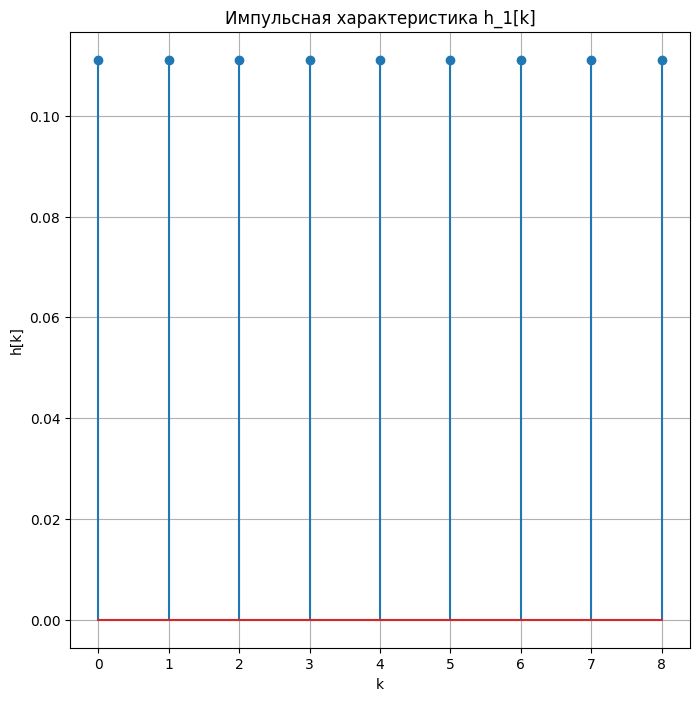

In [6]:
M_1 = 9
M_2 = 29
K = 35
N = 100

k_1 = np.arange(M_1)
k_2 = np.arange(M_2)
h_1 = np.ones(M_1) / M_1 # Из модуля 2 данной лабы
h_2 = np.ones(M_2) / M_2 # Аналогично

plt.figure(figsize=[8, 8], dpi=100)
plt.title("Импульсная характеристика h_1[k]")
plt.stem(k_1, h_1)
plt.grid()
plt.xlabel("k")
plt.ylabel("h[k]")
plt.plot()

[]

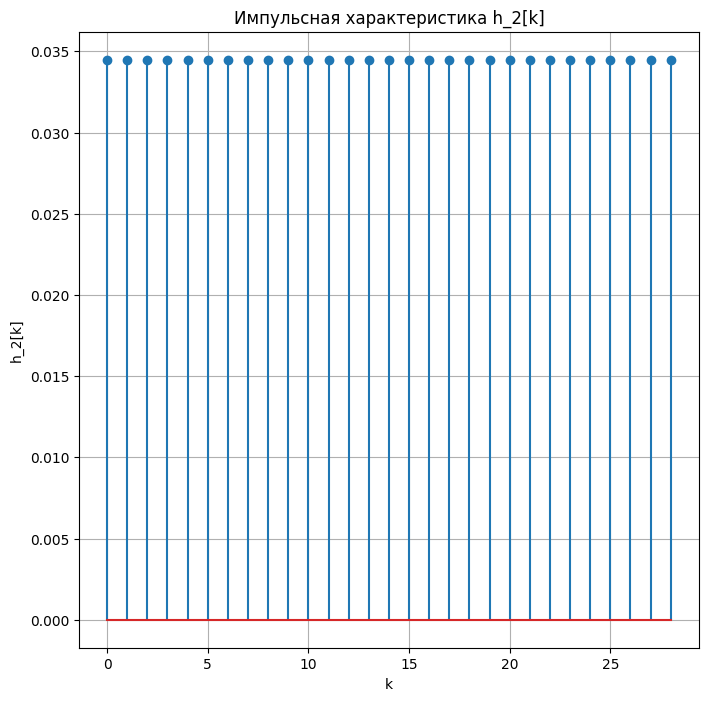

In [7]:
plt.figure(figsize=[8, 8], dpi=100)
plt.title("Импульсная характеристика h_2[k]")
plt.stem(k_2, h_2)
plt.grid()
plt.xlabel("k")
plt.ylabel("h_2[k]")
plt.plot()

### Определение отклика на входное воздействие сигнала с шумом

In [8]:
k = np.arange(N)
x_1 = np.sin(2 * np.pi * k / K) + np.random.normal(0, 0.1, N)
y_1 = signal.convolve(x_1, h_1)

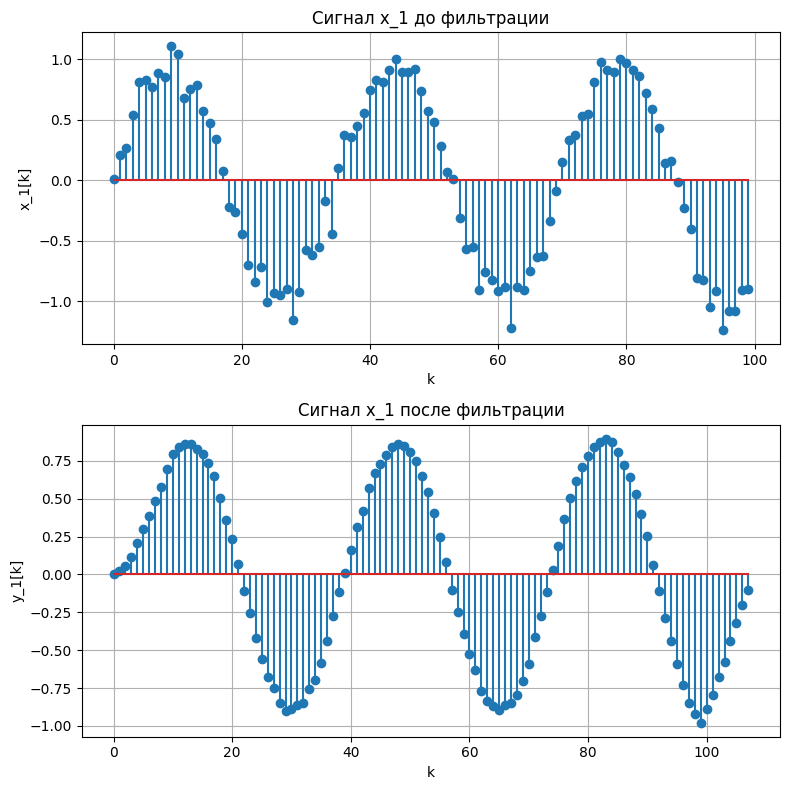

In [10]:
plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(2, 1, 1)
plt.title("Сигнал x_1 до фильтрации")
plt.stem(k, x_1)
plt.grid()
plt.ylabel("x_1[k]")
plt.xlabel("k")

plt.subplot(2, 1, 2)
plt.title("Сигнал x_1 после фильтрации")
plt.stem(np.arange(y_1.size), y_1)
plt.ylabel("y_1[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

In [11]:
k = np.arange(N)
x_2 = np.sin(2 * np.pi * k / K) + np.random.normal(0, 0.1, N)
y_2 = signal.convolve(x_2, h_2)

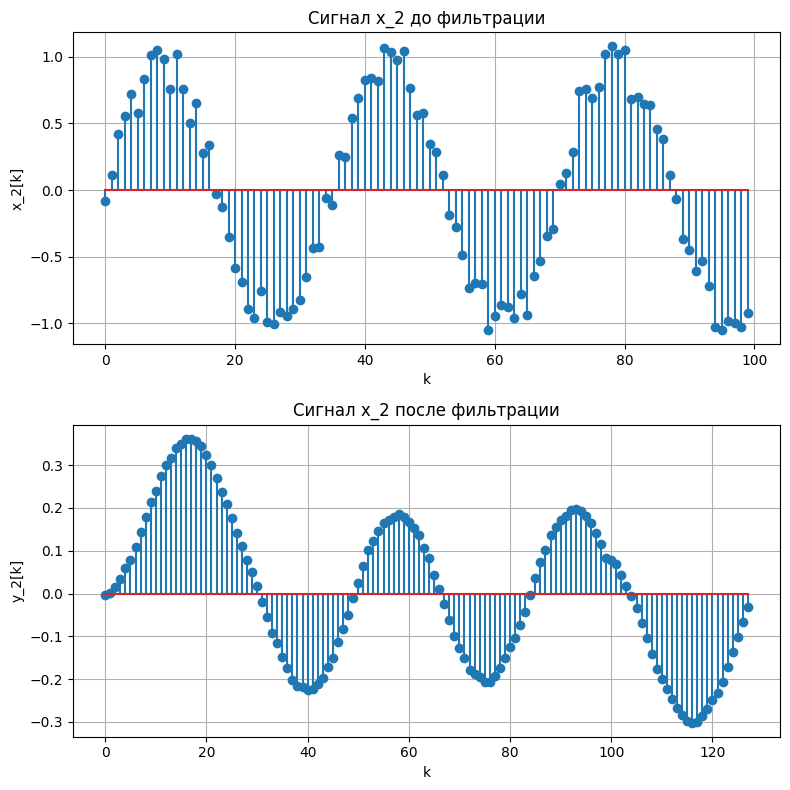

In [12]:
plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(2, 1, 1)
plt.title("Сигнал x_2 до фильтрации")
plt.stem(k, x_2)
plt.grid()
plt.ylabel("x_2[k]")
plt.xlabel("k")

plt.subplot(2, 1, 2)
plt.title("Сигнал x_2 после фильтрации")
plt.stem(np.arange(y_2.size), y_2)
plt.ylabel("y_2[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

In [14]:
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))

In [20]:

def plot_filter_dtft(M: int, h: int) -> None:
    plt.figure(figsize=[9, 5])
    nu, H = dtft(h)
    plt.subplot(2, 1, 1)
    plt.title("АЧХ и ФЧХ фильтра скользящего среднего, M=%i" %M)
    plt.plot(nu, abs(H), 'g')
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$|H(\nu)|$")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.plot(nu, np.angle(H))
    plt.ylabel(r"$\varphi(\nu)$")
    plt.xlabel(r"$\nu$")
    plt.grid()
    plt.tight_layout()


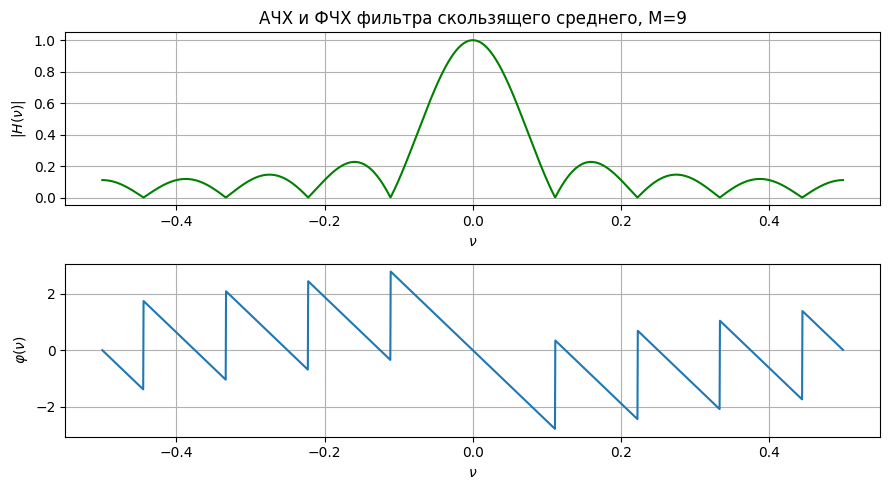

In [21]:
plot_filter_dtft(M_1, h_1)

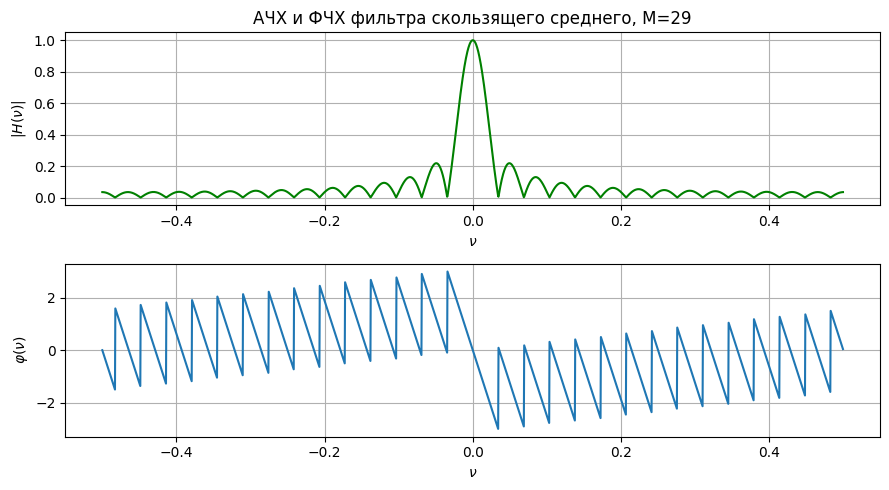

In [22]:
plot_filter_dtft(M_2, h_2)

Сравнивая результат фильтрации сигнала с фильтрами среднего разных параметров M, получаем, что при увеличении M изначальный сигнал сильно искажается

## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

In [26]:
a = 1
b = 0.8
c = 0.5
M = 50
N = 180

A= a / (a + b + c)
B = b / (a + b + c)
C = c / (a + b + c)

k = np.arange(N)

h_1 = np.zeros(3 * N)
h_1[0] = A
h_1[N] = B
h_1[2 * N] = C

h_2 = np.array([0.5, 0.5])


Возьмем x[k] из предыдущего примера

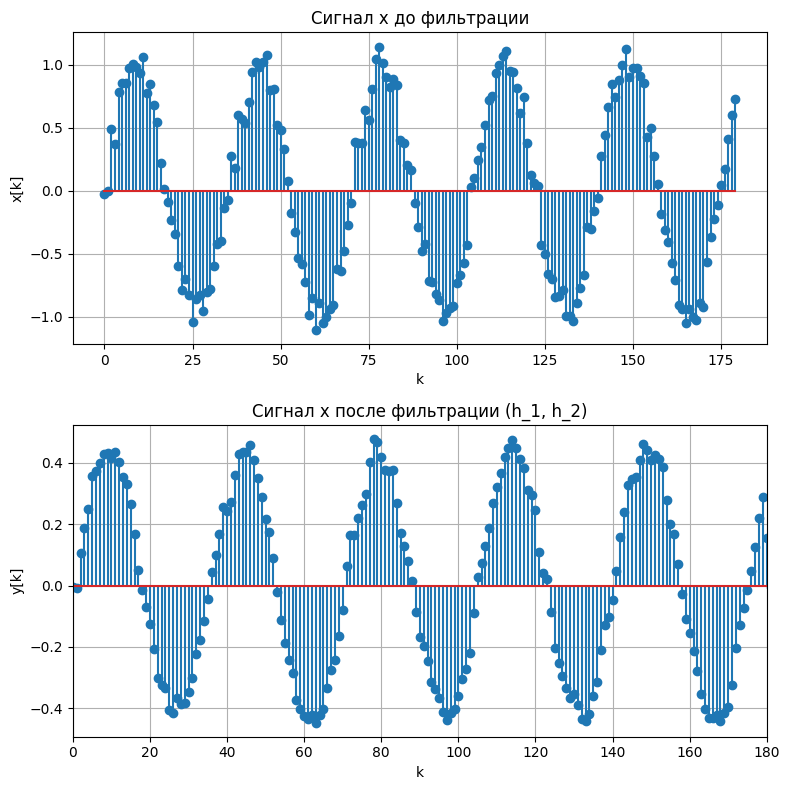

In [31]:
x = np.sin(2 * np.pi * k / K) + np.random.normal(0, 0.1, N)
y_1 = signal.convolve(x, h_1)
y_1 = signal.convolve(y_1, h_2)

plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(2, 1, 1)
plt.title("Сигнал x до фильтрации")
plt.stem(k, x)
plt.grid()
plt.ylabel("x[k]")
plt.xlabel("k")

plt.subplot(2, 1, 2)
plt.title("Сигнал x после фильтрации (h_1, h_2)")
plt.stem(np.arange(y_1.size), y_1)
plt.xlim([0, 180])
plt.ylabel("y[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

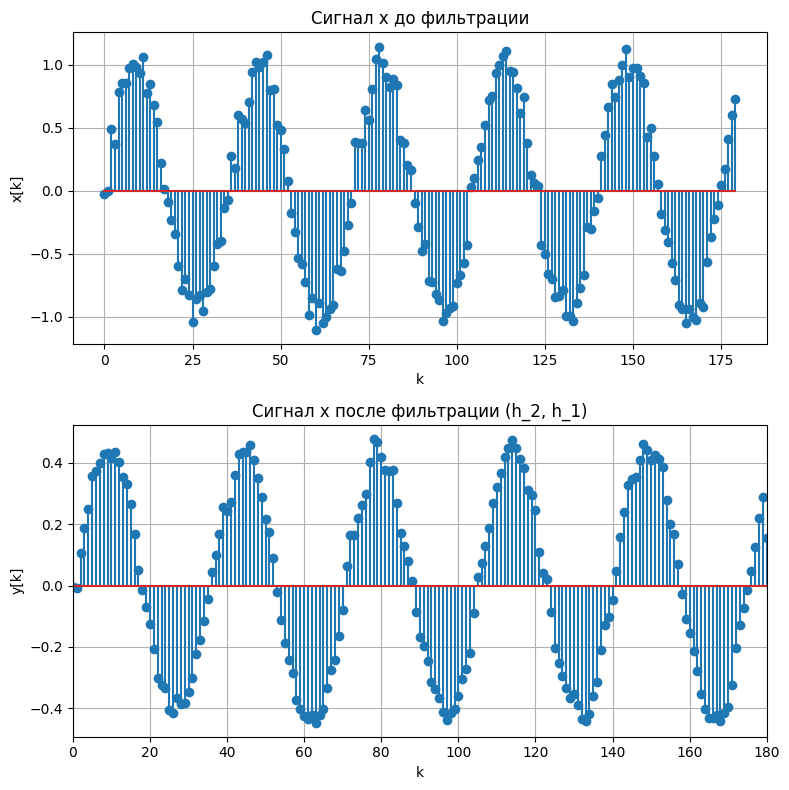

In [32]:

y_2 = signal.convolve(x, h_2)
y_2 = signal.convolve(y_2, h_1)

plt.figure(figsize=[8, 8], dpi=100)
plt.subplot(2, 1, 1)
plt.title("Сигнал x до фильтрации")
plt.stem(k, x)
plt.grid()
plt.ylabel("x[k]")
plt.xlabel("k")

plt.subplot(2, 1, 2)
plt.title("Сигнал x после фильтрации (h_2, h_1)")
plt.stem(np.arange(y_2.size), y_2)
plt.xlim([0, 180])
plt.ylabel("y[k]")
plt.xlabel("k")
plt.grid()
plt.tight_layout()

In [35]:
np.allclose(y_1, y_2)

True

Таким образом, при применении каскада фильтров результат фильтрации не зависит от порядка применения каждого элемента каскада

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
nu_c = 0.1
N = 30

In [11]:
def h_0(k, nu_c):
    if k != 0:
        return np.sin(2 * np.pi * nu_c *k )/(np.pi * k)
    return 2 * nu_c

def partial_sum(N, nu, nu_c):
    k = np.arange(-N, N + 1, 1)
    H_part=np.zeros_like(nu, dtype=complex)
    for k1 in k:
        H_part += h_0(k1, nu_c) * np.exp(-1j * 2 * np.pi * nu * k1)
    return H_part

<Figure size 800x300 with 0 Axes>

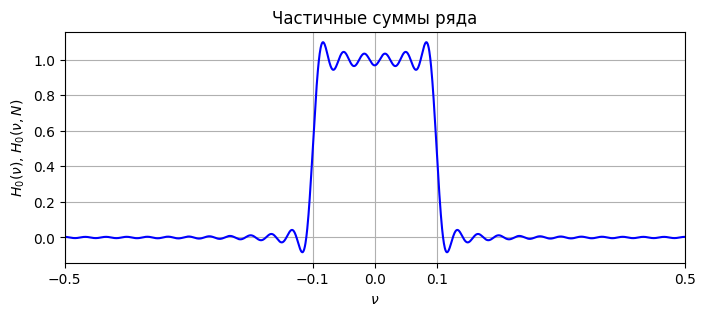

In [14]:

def plot_partial_sum(N, nu_c):
    plt.figure(figsize=[8, 3])
    k=np.arange(-30, 30, 1)

    nu=np.linspace(-0.5, 0.5, 2048)

    plt.figure(figsize=[8, 3])
    plt.plot(nu, partial_sum(N, nu, nu_c).real, 'b')
    plt.xticks([-0.5, -nu_c, 0, nu_c, 0.5])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("$\\nu$")
    plt.ylabel("$H_0(\\nu)$, $H_0(\\nu, N)$")
    plt.title("Частичные суммы ряда")
    plt.grid()
    plt.show()

plot_partial_sum(N, nu_c)

<Figure size 800x300 with 0 Axes>

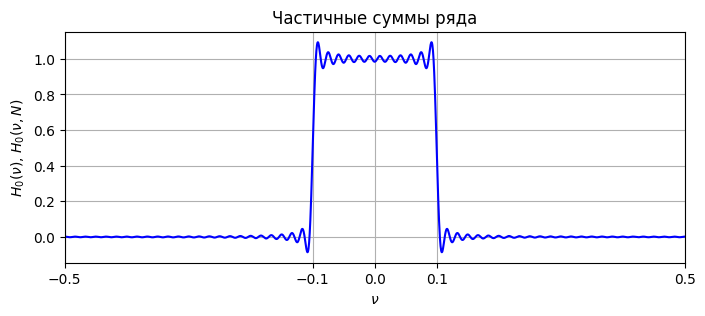

In [15]:
plot_partial_sum(N + 30, nu_c)

<Figure size 800x300 with 0 Axes>

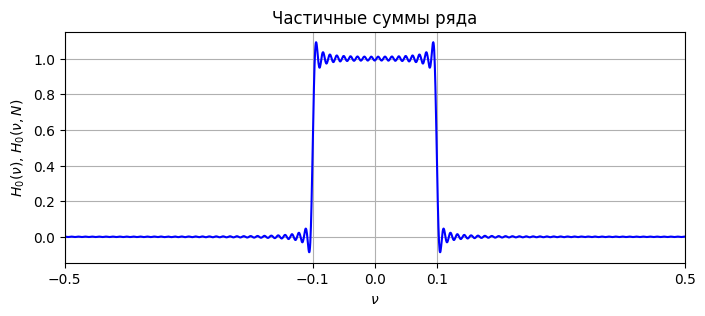

In [16]:
plot_partial_sum(N + 60, nu_c)

<Figure size 800x300 with 0 Axes>

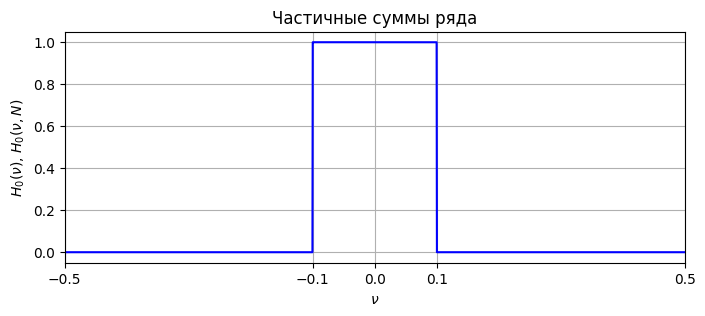

In [17]:
plot_partial_sum(N * 100000, nu_c)

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

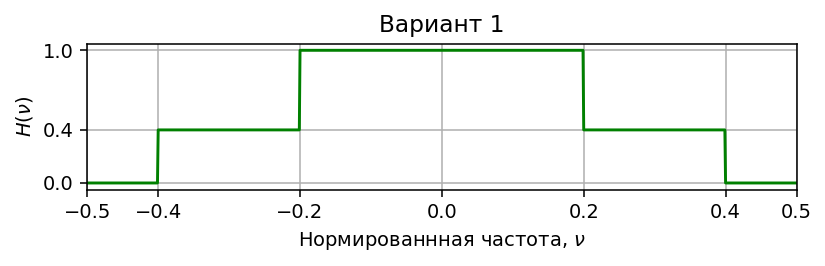

In [10]:
task_3_2(variant=1)

Данная импульсная характеристика является супрепозицией двух импульсных характеристик:

\begin{equation}
h[k] = h_1[k] + h_2[k] = 0.4 \dfrac{\sin(2 \pi \nu_{c1} k)}{\pi k} + 0.6\dfrac{\sin(2\pi \nu_{c2} k)}{\pi k}
\end{equation}

$\nu_{c1} = 0.4, \nu_{c2} = 0.2$

### Анализ усеченной характеристики

In [14]:
N = 30
nu_c_1 = 0.4
nu_c_2 = 0.2
k = np.arange(-N, N, 1)

def h_0_shifted(k, nu_c, N):
    if (k-N)!=0:
        return np.sin(2*np.pi*nu_c*(k-N))/(np.pi*(k-N))
    return 2*nu_c
h = np.array([0.4 * h_0_shifted(x, nu_c_1, N) + 0.6 * h_0_shifted(x, nu_c_2, N) for x in k])


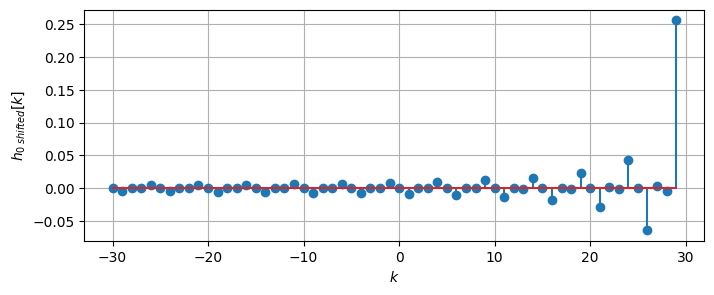

In [15]:
plt.figure(figsize=[8, 3])
plt.stem(k, h)
plt.xlabel("$k$")
plt.ylabel("$h_{0\;shifted}[k]$")
plt.grid()
plt.show()

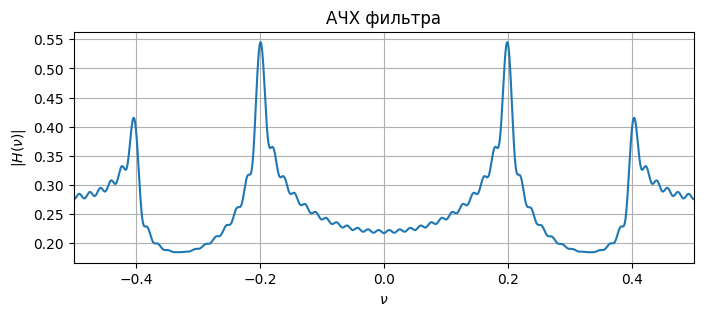

In [16]:
theta, H = signal.freqz(b=h, worN=2**12, whole=True)
nu=theta/(2*np.pi)-0.5
H=np.fft.fftshift(H)

plt.figure(figsize=[8, 3])
plt.plot(nu, abs(H))
plt.xlim([-0.5, 0.5])
plt.title("АЧХ фильтра")
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.grid()
plt.show()